In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle as pkl

## The plotting handler

In [2]:
def plot_with_errorband(ax,trial_data,indices = None,label=''):
    mu = np.mean(trial_data,axis=0)
    std = np.std(trial_data,axis=0)

    if indices is None:
        indices = range(len(mu))
    
    ax.plot(indices,np.array(mu),label=label)
    ax.fill_between(indices,mu+std,mu-std,alpha=0.2)

In [3]:
def cost(Q,hist):
    n_trial = hist.shape[0]
    timesteps = hist.shape[1]
    Q_cost = [hist[i,j].T.dot(Q).dot(hist[i,j]) for i in range(n_trial) for j in range(timesteps)]

    Q_cost = np.array(Q_cost).reshape(n_trial,timesteps)
    return Q_cost

# Total LQR Cost vs $\bar{\eta}$

In [7]:
etas = [0.1,0.5,1.0,1.5,2.0]
control_alg = ['SafeLearning','Benchmark']

In [8]:
data = {}
  
costs = {alg:[] for alg in control_alg}

A_errors = {alg:[] for alg in control_alg}
B_errors = {alg:[] for alg in control_alg}

for alg in control_alg:

    for eta in etas:
        with open('./data/{}_eta_{}.pkl'.format(alg,eta),'rb') as f:
            data[eta] = pkl.load(f)

    with open('Parameters.pkl','rb') as f:
        data['Parameters'] = pkl.load(f)

    Q = data['Parameters']['Q']
    R = data['Parameters']['R']
    A = data['Parameters']['A']
    B = data['Parameters']['B']


    mean_cost = []
    std_cost = []

    for eta in etas:
        x_hist = np.array([d['x'] for d in data[eta]])
        u_hist = np.array([d['u'] for d in data[eta]])

        c = np.sum(cost(Q,x_hist),axis=-1)+np.sum(cost(R,u_hist[:,:,np.newaxis,np.newaxis]),axis=-1)
        costs[alg].append(c)
        
    costs[alg] = np.array(costs[alg])




Text(0, 0.5, 'LQR Cost')

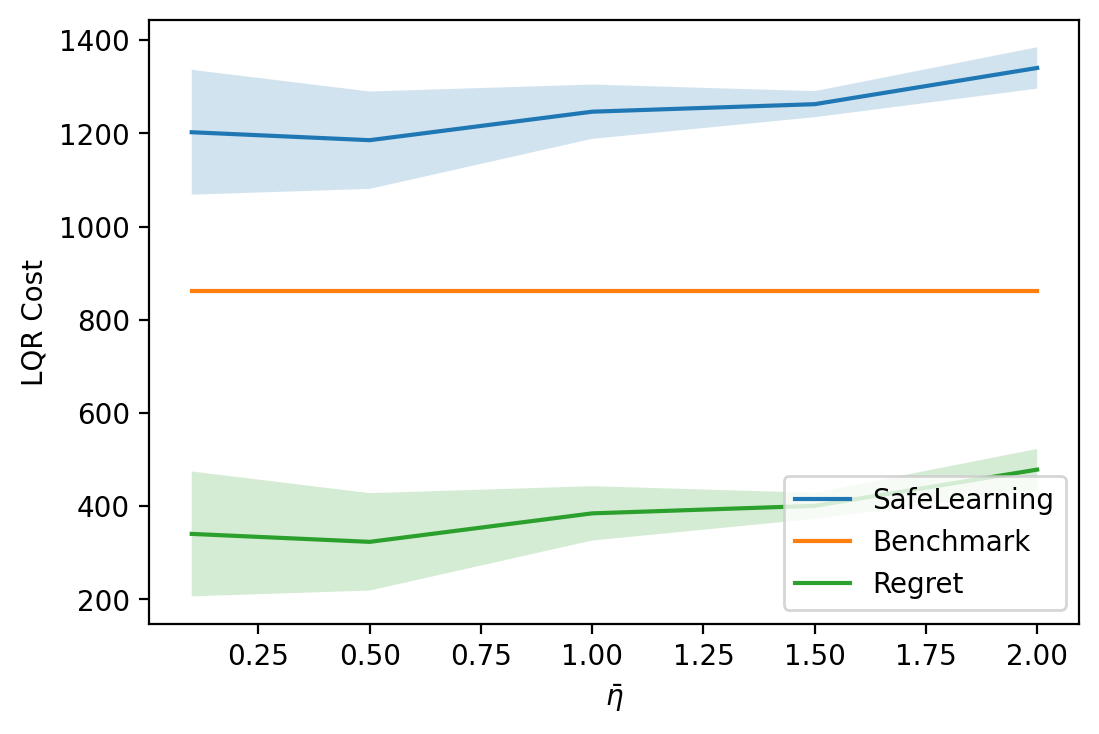

In [10]:

plt.figure(dpi=200)
plot_with_errorband(plt.gca(),costs['SafeLearning'].T,etas,'SafeLearning')
plot_with_errorband(plt.gca(),costs['Benchmark'].T,etas,'Benchmark')

plot_with_errorband(plt.gca(),(costs['SafeLearning']-costs['Benchmark']).T,etas,'Regret')


plt.legend()
plt.xlabel(r'$\bar{\eta}}$')
plt.ylabel('LQR Cost')